<a href="https://colab.research.google.com/github/ProYulia/Hello_Python/blob/main/hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дана функция: f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

Для данной функции необходимо:

- Построить график

- Определить корни 

- Найти интервалы, на которых функция возрастает и убывает 

- Определить промежутки, на котором f > 0 и f < 0


In [35]:
from sympy import symbols, sin, cos
from sympy.plotting import plot
from scipy.optimize import fsolve
import numpy as np

Строим график функции:

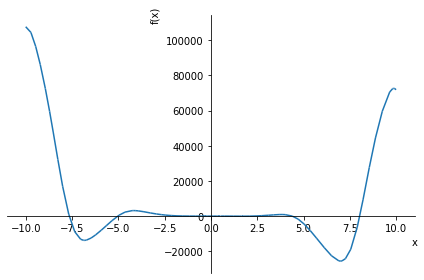

In [80]:
x = symbols('x')
plot(-12 * x**4 * sin(cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30, (x, -10, 10))


In [36]:
def f(x):
  return -12 * x**4 * np.sin(np.cos(x)) - 18 * x**3 + 5 * x**2 + 10 * x - 30

Запрашиваем у пользователя интервал для анализа:

In [37]:
segment = list(map(float, input('Задайте через пробел интервал для x: ').split()))
left_point = min(segment)
right_point = max(segment)

Задайте через пробел интервал для x: 1 10


Ищем корни уравнения для заданного интервала:

In [38]:
def find_roots():
  global left_point, right_point
  number = left_point
  right_point = right_point
  roots = []
  growth_interval = []

  while number < right_point:
      if f(number) >= 0 and f(number + 1) <= 0:
          w = fsolve(f, number)
          roots.append(*w)
      if f(number) <= 0 and f(number + 1) >= 0:
          w = fsolve(f, number)
          roots.append(*w)
      if f(number) > f(number + 1) < f(number + 2):
          growth_interval.append(number + 1)
      number += 1
  roots = [round(i,2) for i in roots]
  print(f'Корни уравнения для заданного интервала: {roots}')
  return roots

Ищем промежутки на заданном интервале, где f>0 и f<0:

In [39]:
def search_top(left, right):
    array = []
    temp = left
    while left < right:
        array.append([f(left), left])
        left += 0.1
    if array[1][0] > 0:
        print(f'f > 0 в промежутке {temp, right}')
        return max(array)
    else:
        print(f'f < 0 в промежутке {temp, right}')
        return min(array)


Ищем вершины функции на заданном интервале:

In [78]:
def find_func_top():
  roots = find_roots()

  if len(roots) < 2:
      print('На заданном интервале нет вершин')
  else:
      top = []
      for i in range(len(roots) - 1):
        top.append(search_top(roots[i], roots[i + 1]))
      for item in top:
        item = [round(i,2) for i in item]
        print(f'Координаты вершины на заданном интервале: [{item[1]}, {item[0]}]')
      return top

Ищем интервалы, на которых функция убывает и возрастает:

In [79]:
from sympy.utilities.iterables import topological_sort
def find_func_increase():
  top = find_func_top()
  if len(top) < 2:
          print('Недостаточно данных для анализа, измените интервал')
  else:
    points = [item[1] for item in top]
    points.append(right_point)
    points.insert(0, left_point)
    for i in range (len(points) - 1):
      if f(points[i]) > f(points[i+1]):
        print(f'Функция убывает на интервале от {round(points[i],2)} до {round(points[i + 1],2)}')
      else:
        print(f'Функция возрастает на интервале от {round(points[i],2)} до {round(points[i + 1],2)}')

find_func_increase()

Корни уравнения для заданного интервала: [2.27, 4.38, 8.04]
f > 0 в промежутке (2.27, 4.38)
f < 0 в промежутке (4.38, 8.04)
Координаты вершины на заданном интервале: [3.77, 868.27]
Координаты вершины на заданном интервале: [6.98, -25602.95]
Функция возрастает на интервале от 1.0 до 3.77
Функция убывает на интервале от 3.77 до 6.98
Функция возрастает на интервале от 6.98 до 10.0
